In [95]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
background_path = 'Background_clean.csv'
log_path = 'Logs_clean.csv'

background_df = pd.read_csv(background_path)
log_df = pd.read_csv(log_path)

In [97]:
pd.set_option('display.max_columns', 500)

In [39]:
background_df.head()

,index,user_id,gender,age_group,LSM_group1,share_your_home_with,including_yourself_how_many_people_do_you_share_your_home_with,do_to_try_to_stay_healthy,drives_you_to_have_a_healthy_lifestyle,eat_or_drink,steps_to_eat_drink_more_healthily,how_regularly_do_you_exercise,exercise_do_you_enjoy,do_to_help_you_sleep,before_you_go_to_sleep
0,1,3.892140e+08,Female,25-34,High,"[""Children over 18 years old""]",4.0,"[""Stay hydrated""]","[""To make the most out of/enjoy life""]","[""None of the above""]","[""Eating out at places that have healthy optio...",3+ times a week,"[""Running"", ""Yoga/Pilates""]","[""Have a bath"", ""Have a malted milk drink""]","[""Browsing on my cell phone / tablet"", ""Caffei..."
1,3,0.000000e+00,Female,45+,High,"[""Partner / spouse""]",1,"[""Drink lots of water / fluids"", ""Eat healthil...","[""To manage a health / medical condition"", ""Pr...","[""Flexitarian: eat meat but control the amount...","[""Intermittent fasting""]",Never,NaN,"[""Have herbal tea"", ""Have a bath""]","[""Caffeine"", ""Heavy meal"", ""Other""]"
2,4,2.647339e+09,Male,25-34,High,"[""Parents"", ""Other family members""]",4.0,"[""Taking time to relax"", ""Eat healthily"", ""Dri...","[""To make the most of treats / indulgent momen...","[""Low sugar"", ""Low salt"", ""Clean eating: eat m...","[""Trying to have a variety of colors on my pla...",3+ times a week,"[""Walking"", ""Cycling"", ""Hiking""]","[""Have warm milk"", ""Other""]","[""Heavy meal"", ""Caffeine""]"
3,5,9.512227e+08,Female,45+,High,"[""Partner / spouse""]",3.0,"[""Eat healthily"", ""Exercise regularly"", ""Make ...","[""To improve my sleep"", ""To manage a health / ...","[""Low salt""]","[""Cooking more meals at home""]",Twice a week,"[""Hiking""]","[""No, none of these""]","[""Caffeine""]"
4,6,1.056650e+09,Male,35-44,Medium,"[""Children under 18 years old"", ""Partner / spo...",5+,"[""Make sure I get enough sleep"", ""Taking time ...","[""To make the most out of/enjoy life"", ""To imp...","[""None of the above""]","[""Cooking more meals at home""]",Never,NaN,"[""No, none of these""]","[""Caffeine""]"


In [103]:
log_df.head()

,submission_id,user_id,location_name,submission_timestamp,where_are_you_eating_1,you_with,where_are_you_eating_2,you_got_your_food_from,while_eating_your_food,who_prepared_the_food,level2dish,reasons_you_chose_this_food,other_food_you_consider_having,describes_the_food_you_have
0,1,3.892140e+08,South Africa,2019-01-31 15:11:16.447589,At school / work,"[""Alone""]",At school / work,I had it at home / brought it from home,"[""Working / studying""]",I prepared it myself from scratch,"[""Pork""]","[""I like the taste""]","[""Nothing""]",Lunch
1,4,2.647339e+09,South Africa,2019-01-24 18:30:12.830288,At my home,"[""Alone""]",At my home,I had it at home / brought it from home,"[""Watching TV"", ""Browsing social media""]",Someone else prepared it,"[""Other potatoes/ sweet potatoes"", ""Bread/ rol...","[""It's a healthy choice"", ""Cheap""]","[""Meat""]",Dinner
2,6,1.056650e+09,South Africa,2019-08-22 15:13:50.876941,On the go / outdoors,"[""My spouse/partner"", ""My children""]",On the go / outdoors,Supermarket / Hypermarket / Grocery Store,"[""Spending time with family""]",It was premade / ready to eat,"[""Biscuits""]","[""Quick"", ""Kids/ family like it""]","[""Nothing""]",Snack
3,7,2.771745e+09,South Africa,2019-05-24 16:21:32.007399,At my home,"[""Alone""]",At my home,NaN,"[""Talking to someone"", ""Spending time with fri...",Someone else prepared it,"[""Cake""]","[""I like the taste""]","[""Nothing""]",Snack
4,8,3.427770e+09,South Africa,2019-02-13 04:02:58.491098,At my home,"[""Alone""]",At my home,I had it at home / brought it from home,"[""Watching TV""]",I prepared it myself from scratch,"[""Bread/ roll/ baguette"", ""Instant noodles""]","[""I like the taste""]","[""Nothing""]",Snack


# Data cleaning

In [104]:
background_df.age_group.replace(to_replace={'26-35': '25-34',
                                           '36-45': '35-44',
                                           '46-55': '45+',
                                           '56+': '45+'},
                                inplace=True)

In [105]:
def get_index_in_set(set_val, item):
    index = 0
    return_index = -1
    for set_item in set_val:
        if set_item == item:
            return_index = index
        index += 1
    return return_index

In [106]:
def list_to_multi_hot(pd_series_list):
    unique_values = set()
    for _, value_list in pd_series_list.iteritems():
        if pd.notnull(value_list):
            for value in ast.literal_eval(value_list):
                unique_values.add(value)
    unique_count = len(unique_values)
    multi_hot = []
    for _, value_list in pd_series_list.iteritems():
        multi_hot_item = [0] * unique_count
        if pd.notnull(value_list):
            for value in ast.literal_eval(value_list):
                index = get_index_in_set(unique_values, value)
                if index != -1:
                    multi_hot_item[index] = 1
        multi_hot.append(multi_hot_item)
    multi_hot = np.array(multi_hot)
    multi_hot = pd.DataFrame(multi_hot)
    multi_hot.columns = [pd_series_list.name + '_' + choice for choice in list(unique_values)]
    return multi_hot

In [107]:
list_columns = ['share_your_home_with', 'do_to_try_to_stay_healthy',
               'drives_you_to_have_a_healthy_lifestyle', 'eat_or_drink',
               'steps_to_eat_drink_more_healthily', 'exercise_do_you_enjoy',
               'do_to_help_you_sleep', 'before_you_go_to_sleep']

for col_name in list_columns:
    multi_hot = list_to_multi_hot(background_df[col_name])
    del background_df[col_name]
    background_df = background_df.join(multi_hot)

In [108]:
background_df.head()

,index,user_id,gender,age_group,LSM_group1,including_yourself_how_many_people_do_you_share_your_home_with,how_regularly_do_you_exercise,share_your_home_with_Friends / Flatmates,share_your_home_with_Partner / spouse,share_your_home_with_Friends / Roommates,share_your_home_with_Other family members,share_your_home_with_Children under 18 years old,share_your_home_with_I live alone,share_your_home_with_Parents,share_your_home_with_Children over 18 years old,do_to_try_to_stay_healthy_Drink lots of water/fluids,do_to_try_to_stay_healthy_Taking time to relax,do_to_try_to_stay_healthy_Exercise regularly,do_to_try_to_stay_healthy_Stress control methods,do_to_try_to_stay_healthy_Drink lots of water / fluids,do_to_try_to_stay_healthy_Eat healthily,do_to_try_to_stay_healthy_Stay hydrated,do_to_try_to_stay_healthy_Nothing,do_to_try_to_stay_healthy_Take vitamin / other supplements,do_to_try_to_stay_healthy_Other,do_to_try_to_stay_healthy_Make sure I get enough sleep,do_to_try_to_stay_healthy_Meditation / positive mindset methods,drives_you_to_have_a_healthy_lifestyle_To support my family,drives_you_to_have_a_healthy_lifestyle_To lose / manage my weight,drives_you_to_have_a_healthy_lifestyle_To manage a health / medical condition,drives_you_to_have_a_healthy_lifestyle_To live longer,drives_you_to_have_a_healthy_lifestyle_To set a good example for my family,drives_you_to_have_a_healthy_lifestyle_Have more energy,drives_you_to_have_a_healthy_lifestyle_To improve brain function/ memory,drives_you_to_have_a_healthy_lifestyle_To make the most out of/enjoy life,drives_you_to_have_a_healthy_lifestyle_Nothing,drives_you_to_have_a_healthy_lifestyle_To make the most of treats / indulgent moments,drives_you_to_have_a_healthy_lifestyle_Prevent health conditions in later life,"drives_you_to_have_a_healthy_lifestyle_Specific event (e.g. holiday, wedding)",drives_you_to_have_a_healthy_lifestyle_I feel pressured because everyone else is doing it,drives_you_to_have_a_healthy_lifestyle_Lack of money,drives_you_to_have_a_healthy_lifestyle_Other,drives_you_to_have_a_healthy_lifestyle_To improve my sleep,drives_you_to_have_a_healthy_lifestyle_To make the most out of / enjoy life,drives_you_to_have_a_healthy_lifestyle_Feeling good about myself,eat_or_drink_Low calorie,eat_or_drink_Clean eating: eat minimally processed food (i.e. whole / natural / organic foods),eat_or_drink_Other - specify,eat_or_drink_High protein,eat_or_drink_Low salt,eat_or_drink_Low / zero carb,eat_or_drink_Halal,"eat_or_drink_Vegan: eat no meat, fish, or dairy",eat_or_drink_Vegetarian: eat no meat or fish,eat_or_drink_Paleo,eat_or_drink_Flexitarian: eat meat but control the amount eaten,eat_or_drink_Keto,eat_or_drink_Plant based,eat_or_drink_Specific diet - specify,"eat_or_drink_Pescatarian: eat fish, but no meat",eat_or_drink_Specific diet,eat_or_drink_Other,eat_or_drink_Kosher,eat_or_drink_Organic,eat_or_drink_Dairy free,eat_or_drink_Pescatarian: eat no meat,eat_or_drink_Gluten / wheat free,eat_or_drink_Low cholesterol,eat_or_drink_Low sugar,eat_or_drink_None of the above,steps_to_eat_drink_more_healthily_Cooking more meals at home,steps_to_eat_drink_more_healthily_Shopping at places that have a wide selection of healthy options,steps_to_eat_drink_more_healthily_Snacking less often,steps_to_eat_drink_more_healthily_Trying to have a variety of colors on my plate,steps_to_eat_drink_more_healthily_Eating out at places that have healthy options available,steps_to_eat_drink_more_healthily_Filling half my plate with vegetables,steps_to_eat_drink_more_healthily_Eating out / ordering takeout less frequently,steps_to_eat_drink_more_healthily_Intermittent fasting,steps_to_eat_drink_more_healthily_Checking / reading the ingredients in food / drink products,steps_to_eat_drink_more_healthily_Making an effort to find healthy recipes,steps_to_eat_drink_more_healthily_Eating dessert less often,steps_to_eat_drink_more_healthily_Watching the size of my portions,steps_to_eat_drink_more_healthily_Doing a clea

In [109]:
list_columns = ['you_with', 'while_eating_your_food', 'level2dish', 'reasons_you_chose_this_food',
               'other_food_you_consider_having']

for col_name in list_columns:
    multi_hot = list_to_multi_hot(log_df[col_name])
    del log_df[col_name]
    log_df = log_df.join(multi_hot)

In [110]:
del log_df['where_are_you_eating_2']
log_df.head()

,submission_id,user_id,location_name,submission_timestamp,where_are_you_eating_1,you_got_your_food_from,who_prepared_the_food,describes_the_food_you_have,you_with_Friends,you_with_My spouse/partner,you_with_My children,you_with_Other family members,you_with_Colleagues,you_with_Alone,while_eating_your_food_Spending time with family,while_eating_your_food_Watching TV,while_eating_your_food_Shopping,while_eating_your_food_Paying bills/ finance,while_eating_your_food_Playing with kids,while_eating_your_food_Listening to music,while_eating_your_food_Listening to radio,while_eating_your_food_Browsing the internet,while_eating_your_food_Playing games,while_eating_your_food_Getting ready,while_eating_your_food_On my phone,while_eating_your_food_Other,while_eating_your_food_Cooking,while_eating_your_food_Travelling,while_eating_your_food_Talking to someone,while_eating_your_food_Playing with pets,while_eating_your_food_Working / studying,while_eating_your_food_Personal caring,while_eating_your_food_Exercising / working out,while_eating_your_food_Spending time with friends,while_eating_your_food_Smoking,while_eating_your_food_Checking emails,while_eating_your_food_Browsing social media,while_eating_your_food_Walking,while_eating_your_food_Relaxing / laying down,while_eating_your_food_Household chores,while_eating_your_food_Driving,"while_eating_your_food_Hobbies (e.g. knitting, crocheting, painting, writing)",while_eating_your_food_Nothing,while_eating_your_food_Reading,while_eating_your_food_Waiting,level2dish_Rice with vegetables,level2dish_Cereal,level2dish_Pasta with meat,level2dish_Toast,level2dish_Other egg based dishes,level2dish_Salad vegetables,level2dish_Mushroom,level2dish_Pork,level2dish_Chocolate cereal/ muesli bar,level2dish_Tropical and exotic fruit,level2dish_Lentil/ quinoa crisps,level2dish_Meaty snacks,level2dish_Egg-based dish,level2dish_Sandwich/ bagel,level2dish_Mashed potatoes/ sweet potatoes,level2dish_Chocolate sweets/ snacks,level2dish_Toast with spread,"level2dish_Fried sweets (e.g. churros, donuts)",level2dish_Meat noodles,level2dish_Stone fruit,level2dish_Cheese pizza,level2dish_Nachos,level2dish_Root veg,level2dish_Soft desserts,level2dish_Noodles,level2dish_Wraps/ tacos,level2dish_Savoury pie,level2dish_Vegetable crisps,level2dish_Plain rice,"level2dish_Broccolli, cabbage, cauliflower",level2dish_Leafy green veg,level2dish_Citrus fruit,level2dish_Muesli/ granola,level2dish_Savoury pastry,level2dish_Plain pasta,level2dish_Honey / syrup,level2dish_Soft cheese/ cheese spread,level2dish_Olives,level2dish_Meat alternative,level2dish_Other fruit,level2dish_Pasta with sauce,level2dish_Peas and beans,level2dish_Hard cheese,level2dish_Seafood soup,level2dish_Other dishes,level2dish_Meat soup,level2dish_Croissants/ sweet pastry,level2dish_Couscous,level2dish_Meat-based pizza,level2dish_Lamb,level2dish_Biscuits with filling,level2dish_Plain yoghurt (savoury),level2dish_Jelly,level2dish_Fudge/ nougat,level2dish_Waffles,level2dish_Berries / cherries / grapes,level2dish_Savoury snacks,level2dish_Sweet pies/ tarts,level2dish_Seeds,level2dish_Marrow and aubergine,level2dish_Cured meats,level2dish_Chocolate bar,level2dish_Other grains,level2dish_Vegetable curry,level2dish_Protein bar,level2dish_Plain yoghurt (sweet),level2dish_Sweet spread,level2dish_Pasta with vegetables,level2dish_Dumplings,level2dish_Green salad,level2dish_Savoury biscuits,level2dish_Chicken,level2dish_Cake,level2dish_Muffins/ cupcakes,level2dish_Blue cheese,level2dish_Other fish,level2dish_Plain nuts,level2dish_Apples and pears,level2dish_Custards/ sweet puddings,level2dish_Shellfish,level2dish_Lentils,level2dish_Cured sausage,level2dish_Bread/ roll/ baguette,level2dish_Bread with sweet spread,level2dish_Fruit flavoured yoghurt,level2dish_Dip/ salsa,level2dish_Other meat,level2dish_Fried snacks,level2dish_Duck,level2dish_Chutney,level2dish_Mixed vegetables,level2dish_Rice with meat,level2dish_Turkey,level2dish_Crackers/ wafers,level2dish_Fruit salad,lev

In [111]:
all_data = background_df.merge(log_df, left_on='user_id', right_on='user_id')
print(background_df.shape[0], log_df.shape[0], all_data.shape[0])
all_data.head()

1016 1200 1200


,index,user_id,gender,age_group,LSM_group1,including_yourself_how_many_people_do_you_share_your_home_with,how_regularly_do_you_exercise,share_your_home_with_Friends / Flatmates,share_your_home_with_Partner / spouse,share_your_home_with_Friends / Roommates,share_your_home_with_Other family members,share_your_home_with_Children under 18 years old,share_your_home_with_I live alone,share_your_home_with_Parents,share_your_home_with_Children over 18 years old,do_to_try_to_stay_healthy_Drink lots of water/fluids,do_to_try_to_stay_healthy_Taking time to relax,do_to_try_to_stay_healthy_Exercise regularly,do_to_try_to_stay_healthy_Stress control methods,do_to_try_to_stay_healthy_Drink lots of water / fluids,do_to_try_to_stay_healthy_Eat healthily,do_to_try_to_stay_healthy_Stay hydrated,do_to_try_to_stay_healthy_Nothing,do_to_try_to_stay_healthy_Take vitamin / other supplements,do_to_try_to_stay_healthy_Other,do_to_try_to_stay_healthy_Make sure I get enough sleep,do_to_try_to_stay_healthy_Meditation / positive mindset methods,drives_you_to_have_a_healthy_lifestyle_To support my family,drives_you_to_have_a_healthy_lifestyle_To lose / manage my weight,drives_you_to_have_a_healthy_lifestyle_To manage a health / medical condition,drives_you_to_have_a_healthy_lifestyle_To live longer,drives_you_to_have_a_healthy_lifestyle_To set a good example for my family,drives_you_to_have_a_healthy_lifestyle_Have more energy,drives_you_to_have_a_healthy_lifestyle_To improve brain function/ memory,drives_you_to_have_a_healthy_lifestyle_To make the most out of/enjoy life,drives_you_to_have_a_healthy_lifestyle_Nothing,drives_you_to_have_a_healthy_lifestyle_To make the most of treats / indulgent moments,drives_you_to_have_a_healthy_lifestyle_Prevent health conditions in later life,"drives_you_to_have_a_healthy_lifestyle_Specific event (e.g. holiday, wedding)",drives_you_to_have_a_healthy_lifestyle_I feel pressured because everyone else is doing it,drives_you_to_have_a_healthy_lifestyle_Lack of money,drives_you_to_have_a_healthy_lifestyle_Other,drives_you_to_have_a_healthy_lifestyle_To improve my sleep,drives_you_to_have_a_healthy_lifestyle_To make the most out of / enjoy life,drives_you_to_have_a_healthy_lifestyle_Feeling good about myself,eat_or_drink_Low calorie,eat_or_drink_Clean eating: eat minimally processed food (i.e. whole / natural / organic foods),eat_or_drink_Other - specify,eat_or_drink_High protein,eat_or_drink_Low salt,eat_or_drink_Low / zero carb,eat_or_drink_Halal,"eat_or_drink_Vegan: eat no meat, fish, or dairy",eat_or_drink_Vegetarian: eat no meat or fish,eat_or_drink_Paleo,eat_or_drink_Flexitarian: eat meat but control the amount eaten,eat_or_drink_Keto,eat_or_drink_Plant based,eat_or_drink_Specific diet - specify,"eat_or_drink_Pescatarian: eat fish, but no meat",eat_or_drink_Specific diet,eat_or_drink_Other,eat_or_drink_Kosher,eat_or_drink_Organic,eat_or_drink_Dairy free,eat_or_drink_Pescatarian: eat no meat,eat_or_drink_Gluten / wheat free,eat_or_drink_Low cholesterol,eat_or_drink_Low sugar,eat_or_drink_None of the above,steps_to_eat_drink_more_healthily_Cooking more meals at home,steps_to_eat_drink_more_healthily_Shopping at places that have a wide selection of healthy options,steps_to_eat_drink_more_healthily_Snacking less often,steps_to_eat_drink_more_healthily_Trying to have a variety of colors on my plate,steps_to_eat_drink_more_healthily_Eating out at places that have healthy options available,steps_to_eat_drink_more_healthily_Filling half my plate with vegetables,steps_to_eat_drink_more_healthily_Eating out / ordering takeout less frequently,steps_to_eat_drink_more_healthily_Intermittent fasting,steps_to_eat_drink_more_healthily_Checking / reading the ingredients in food / drink products,steps_to_eat_drink_more_healthily_Making an effort to find healthy recipes,steps_to_eat_drink_more_healthily_Eating dessert less often,steps_to_eat_drink_more_healthily_Watching the size of my portions,steps_to_eat_drink_more_healthily_Doing a clea

# 1 young people’s food consumption whilst at home.

In [112]:
young_home = all_data[np.logical_and(all_data.age_group == '18-24', all_data.where_are_you_eating_1 == 'At my home')]
old_home = all_data[np.logical_and(all_data.age_group != '18-24', all_data.where_are_you_eating_1 == 'At my home')]
young_out = all_data[np.logical_and(all_data.age_group == '18-24', all_data.where_are_you_eating_1 != 'At my home')]

/home/ahmed/miniconda3/envs/base_development/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/ahmed/miniconda3/envs/base_development/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/ahmed/miniconda3/envs/base_development/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

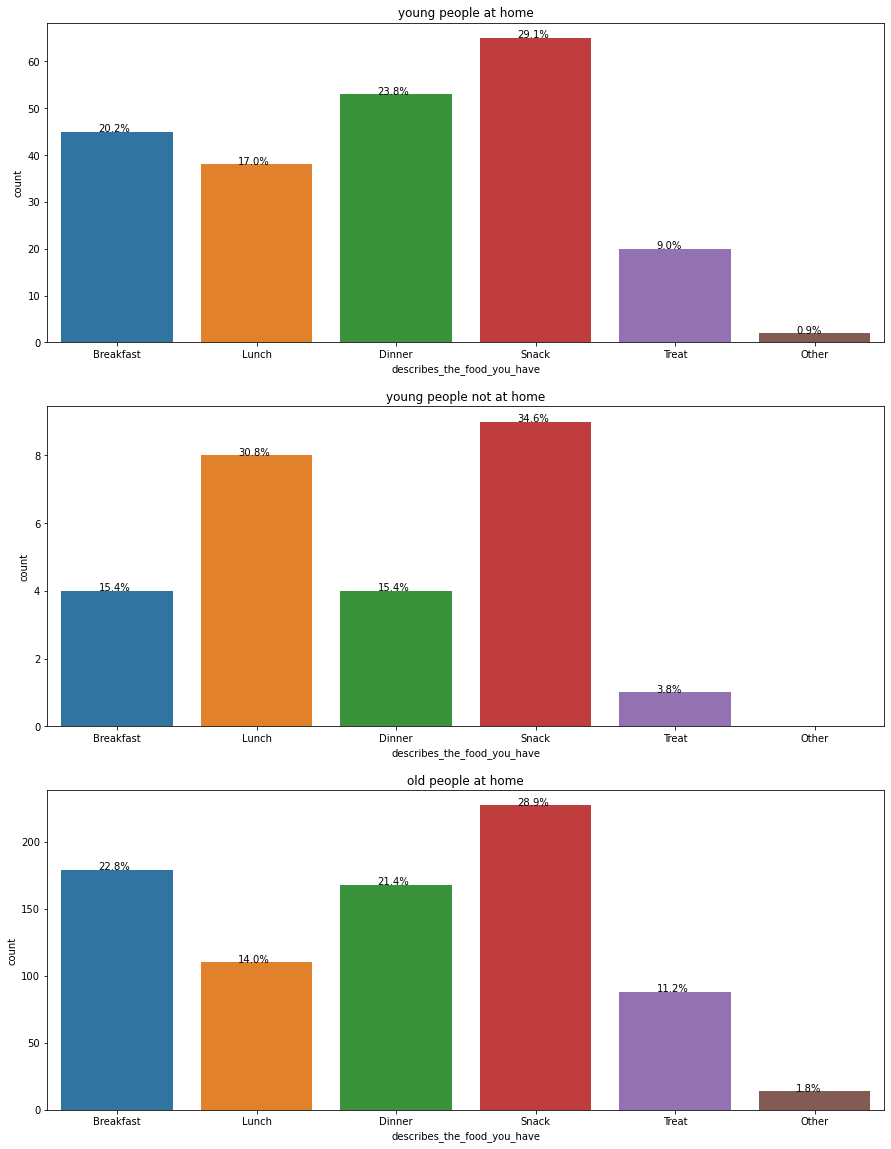

In [113]:
plt.rcParams['figure.figsize'] = [15, 20]
plt.subplot(3, 1, 1)
ax = sns.countplot(young_home.describes_the_food_you_have, order=['Breakfast', 'Lunch', 'Dinner', 'Snack', 'Treat', 'Other'])
plt.title('young people at home')
total = young_home.shape[0]
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/3
    y = p.get_height()
    ax.annotate(percentage, (x, y))
    
plt.subplot(3, 1, 2)
ax = sns.countplot(young_out.describes_the_food_you_have, order=['Breakfast', 'Lunch', 'Dinner', 'Snack', 'Treat', 'Other'])
plt.title('young people not at home')
total = young_out.shape[0]
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/3
    y = p.get_height()
    ax.annotate(percentage, (x, y))

plt.subplot(3, 1, 3)
ax = sns.countplot(old_home.describes_the_food_you_have, order=['Breakfast', 'Lunch', 'Dinner', 'Snack', 'Treat', 'Other'])
plt.title('old people at home')
total = old_home.shape[0]
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/3
    y = p.get_height()
    ax.annotate(percentage, (x, y))